In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

In [2]:
# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

In [3]:
# colnames=['ip', 'timestamp', 'request_method', 'status', 'size',
#           'destination', 'request_agent']
# df_orig = pd.read_csv('anonymized-curriculum-access.txt',          
#                  engine='python',
#                  header=None,
#                  index_col=False,
#                  names=colnames,
#                  sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
#                  na_values='"-"',
#                  usecols=[0, 3, 4, 5, 6, 7, 8]
# )

In [4]:
df = pd.read_csv('curriculum.txt',
                engine='python',
                 header=None,
                 index_col=False,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',)




In [5]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
df.columns = ['date', 'time', 'page_viewed', 'user_id', 'cohort_id', 'ip']

In [7]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         719459 non-null  object 
 1   time         719459 non-null  object 
 2   page_viewed  719458 non-null  object 
 3   user_id      719459 non-null  int64  
 4   cohort_id    674619 non-null  float64
 5   ip           719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ MB


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674618 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         674618 non-null  object 
 1   time         674618 non-null  object 
 2   page_viewed  674618 non-null  object 
 3   user_id      674618 non-null  int64  
 4   cohort_id    674618 non-null  float64
 5   ip           674618 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 36.0+ MB


In [11]:
df.dropna(inplace=True)
df.cohort_id = df.cohort_id.astype('int')
df['date'] = df.date + " " + df.time
df.drop(columns=('time'), inplace=True)
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [12]:
df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [14]:
# df.drop(columns=('time'), inplace=True)

In [15]:
df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [16]:
df['page_viewed'].value_counts()

/                            36074
javascript-i                 13912
search/search_index.json     13602
toc                          13413
java-iii                     10614
                             ...  
ada-capsontes.html               1
Exploration_Lecture              1
2.1-spreadsheets-overview        1
b-clustering/project             1
python                           1
Name: page_viewed, Length: 2060, dtype: int64

In [17]:
def compute_entropy(series):
    counts = series.value_counts()
    if len(counts)==1:
        ent = 0
    else:
        value, counts = np.unique(series, return_counts=True)
        ent = entropy(counts, base=None)
    return ent

In [18]:
compute_entropy(df.ip)

4.198666302653029

In [19]:
compute_entropy(df.cohort_id)

3.2014554018220913

In [20]:
df.date.value_counts()

AttributeError: 'DataFrame' object has no attribute 'date'

In [21]:
df.date = pd.to_datetime(df.date)

AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')


In [ ]:
df['user_id'].value_counts()

In [ ]:
df['cohort_id'].value_counts()

In [ ]:
new_df = df[['cohort_id']]

In [ ]:
new_df.head()

In [ ]:
new_df.resample('W').sum()

In [ ]:
train = df[:'2019-12-31 22:52:12 ']
validate = df['2019-12-31 22:52:13':'2020-02-01 00:00:00']
test = df['2020-02-01 00:00:01':]

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.plot(train)
# plt.plot(validate)
# plt.plot(test)
# plt.show()

In [ ]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})
ip_df2 = pd.DataFrame(df.ip.value_counts(dropna=False)/df.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})
ip_df = ip_df.merge(ip_df2)

In [ ]:
ip_df[ip_df.ip_proba < .01]


In [ ]:
# print(len(ip_df))

# print(ip_df.tail(10))

# plt.figure(figsize=(12, 4))
# splot = sns.barplot(data=ip_df, x = 'ip', y = 'ip_count', ci = None)
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', xytext = (0, 10), 
#                    textcoords = 'offset points'
#                    )
#     plt.xticks(rotation='vertical')

In [ ]:
train.info()

In [ ]:
ip_df = pd.DataFrame(train.ip.value_counts(dropna=False)/train.ip.count()).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_proba'})

In [ ]:
ip_df

In [ ]:
df = df.reset_index().merge(ip_df, on=['ip'], how='left').fillna(value=0).set_index('date')
df.ip_proba.value_counts()

In [ ]:
df.head()

In [ ]:
df.ip_proba.value_counts()

In [ ]:
ip_probs = df.groupby('ip').size().div(len(df))

cohort_given_ip = pd.DataFrame(df.groupby(['ip', 'cohort_id']).\
                               size().div(len(df)).\
                               div(ip_probs, 
                                   axis=0, 
                                   level='ip').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_cohort_given_ip'})
                              )

In [ ]:
cohort_given_ip.head()

In [ ]:
df.info()

In [ ]:
df = df.reset_index().merge(cohort_given_ip, on=['ip', 'cohort_id'], how='left').fillna(value=0).set_index('date')


In [ ]:
df.head()

In [ ]:
df['proba_cohort_given_ip'].value_counts()

In [ ]:
df[df['proba_cohort_given_ip'] == 1]

In [ ]:
plt.scatter(df.proba_cohort_given_ip, df.ip_proba)


# New Analysis of cohort with most activity and user with most activity within that cohort

In [22]:
df = pd.read_csv('curriculum.txt',
                engine='python',
                 header=None,
                 index_col=False,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"',)


In [23]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [24]:
df.columns = ['date', 'time', 'page_viewed', 'user_id', 'cohort_id', 'ip']

In [25]:
df.head()

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [26]:
df.dropna(inplace=True)
df.cohort_id = df.cohort_id.astype('int')
df['date'] = df.date + " " + df.time
df.drop(columns=('time'), inplace=True)
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [27]:
df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61


In [28]:
df.groupby(['cohort_id', 'user_id']).page_viewed.agg('count')

cohort_id  user_id
1          11         2735
           60          517
           64         3767
           95            9
           141           9
                      ... 
62         772          26
           773         345
           774         362
           775         237
           776         365
Name: page_viewed, Length: 748, dtype: int64

In [29]:
df.cohort_id.value_counts()

28    60315
33    40168
29    37548
53    36047
24    35624
57    32447
56    31670
22    30328
51    29688
58    28354
32    28333
23    28329
26    27637
52    27518
25    25427
31    25253
34    25181
59    22425
27    20447
55    20410
61    11774
14     9495
1      8884
62     8718
21     7444
17     4925
13     2733
18     2005
8      1712
19     1165
16      743
15      691
7       495
12      302
11      208
2        93
6        72
9         5
4         4
5         1
Name: cohort_id, dtype: int64

In [30]:
new_df = df[df.cohort_id == 28]

In [31]:
new_df.shape

(60315, 4)

In [32]:
new_df.groupby(['user_id']).page_viewed.agg('count').sort_values(ascending=False)

user_id
11     12135
64     10627
1       4823
428     4505
248     3868
314     3253
211     2896
53      2677
545     2568
514     2043
546     2011
404     1668
315     1335
146     1216
521     1088
742      711
480      412
37       374
502      349
572      343
397      305
618      240
41       196
257      160
312      131
738       79
539       75
653       74
40        66
370       54
620       24
461        6
652        1
592        1
745        1
Name: page_viewed, dtype: int64

In [33]:
new_df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28,97.105.19.58
2018-12-06 14:25:40,javascript-i,314,28,97.105.19.58
2018-12-06 14:25:41,javascript-i/coffee-project,314,28,97.105.19.58
2018-12-06 15:31:29,spring,40,28,170.248.173.247
2018-12-06 15:31:33,spring/fundamentals/security,40,28,170.248.173.247


<AxesSubplot:xlabel='date'>

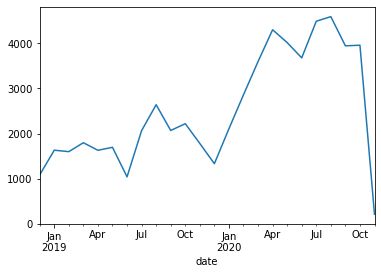

In [34]:
new_df.resample('M').user_id.agg('count').plot()

In [35]:
newer_df = new_df[new_df.user_id == 11]

In [36]:
newer_df.shape

(12135, 4)

<AxesSubplot:xlabel='date'>

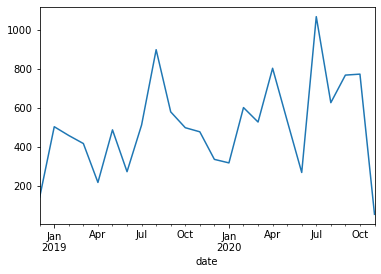

In [37]:
newer_df.resample('M').page_viewed.agg('count').plot()

In [38]:
newer_df.index.max()

Timestamp('2020-11-02 16:42:06')

In [39]:
newer_df.index.min()

Timestamp('2018-12-07 09:05:02')

<AxesSubplot:xlabel='date'>

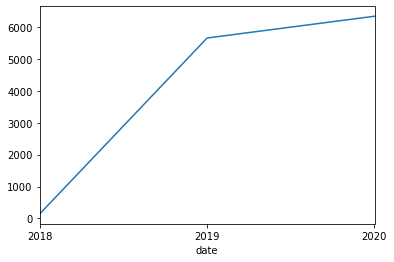

In [40]:
newer_df.resample('Y').page_viewed.agg('count').plot()

<AxesSubplot:xlabel='date'>

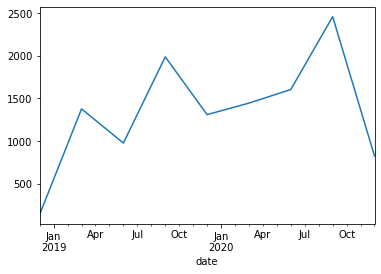

In [41]:
newer_df.resample('3M').page_viewed.agg('count').plot()

<AxesSubplot:xlabel='date'>

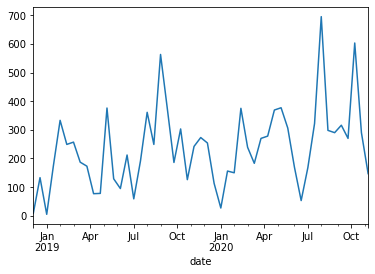

In [42]:
newer_df.resample('2W').page_viewed.agg('count').plot()

In [43]:
newer_df.ip.value_counts()

97.105.19.58       5995
76.185.145.231     3852
76.185.131.226     1897
76.185.142.244      238
76.185.152.58        71
72.128.136.219       23
72.181.121.84        11
192.171.117.210      11
67.164.150.90        11
75.1.201.239          9
208.54.83.145         4
75.54.33.188          2
208.54.83.163         2
144.178.1.46          2
99.203.155.182        1
99.203.155.78         1
208.54.83.234         1
99.203.143.2          1
99.203.27.231         1
172.56.15.51          1
99.203.26.9           1
Name: ip, dtype: int64

In [44]:
newer_df[(newer_df.index.hour > 2) & (newer_df.index.hour < 4)]

,page_viewed,user_id,cohort_id,ip
date,,,,
2019-09-12 03:38:02,/,11,28,76.185.131.226
2019-09-12 03:38:33,1-fundamentals/1.1-intro-to-data-science,11,28,76.185.131.226
2019-09-12 03:38:33,1-fundamentals/modern-data-scientist.jpg,11,28,76.185.131.226
2019-09-12 03:38:33,1-fundamentals/AI-ML-DL-timeline.jpg,11,28,76.185.131.226
2019-09-12 03:38:37,appendix/cli-git-overview,11,28,76.185.131.226
2019-09-12 03:59:33,/,11,28,76.185.131.226
2019-09-12 03:59:37,1-fundamentals/1.1-intro-to-data-science,11,28,76.185.131.226
2019-09-12 03:59:37,1-fundamentals/modern-data-scientist.jpg,11,28,76.185.131.226
2019-09-12 03:59:37,1-fundamentals/AI-ML-DL-timeline.jpg,11,28,76.185.131.226


In [45]:
newer_df['day'] = newer_df.index.day_name

In [46]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day
date,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,<bound method inherit_from_data.<locals>.metho...
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,<bound method inherit_from_data.<locals>.metho...
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,<bound method inherit_from_data.<locals>.metho...
2018-12-07 14:55:06,/,11,28,97.105.19.58,<bound method inherit_from_data.<locals>.metho...
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,<bound method inherit_from_data.<locals>.metho...


In [47]:
newer_df.drop(columns='day', inplace=True)

In [48]:
newer_df['day'] = newer_df.index.day_name()

In [49]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day
date,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday


In [50]:
newer_df.day.value_counts().sort_values(ascending=False)

Monday       2695
Tuesday      2581
Wednesday    2511
Thursday     2122
Friday       1663
Sunday        372
Saturday      191
Name: day, dtype: int64

In [51]:
pd.crosstab(newer_df.ip, newer_df.day)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
ip,,,,,,,
144.178.1.46,0,0,0,0,2,0,0
172.56.15.51,0,0,0,0,0,0,1
192.171.117.210,7,0,0,0,0,0,4
208.54.83.145,4,0,0,0,0,0,0
208.54.83.163,0,0,0,0,0,2,0
208.54.83.234,1,0,0,0,0,0,0
67.164.150.90,0,0,0,0,3,7,1
72.128.136.219,0,0,0,0,0,23,0
72.181.121.84,0,0,0,0,0,0,11


In [52]:
mask = newer_df.page_viewed.value_counts()
NewDf = newer_df[newer_df['page_viewed'].isin(mask.index[mask>200])]

In [53]:
NewDf.page_viewed.value_counts()

/                                                    1229
6-regression/1-overview                               342
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     332
10-anomaly-detection/1-overview                       332
search/search_index.json                              305
classification/overview                               277
1-fundamentals/modern-data-scientist.jpg              273
1-fundamentals/AI-ML-DL-timeline.jpg                  271
1-fundamentals/1.1-intro-to-data-science              270
appendix/cli-git-overview                             247
sql/mysql-overview                                    231
3-sql/1-mysql-overview                                231
Name: page_viewed, dtype: int64

In [54]:
NewDf.head()

,page_viewed,user_id,cohort_id,ip,day
date,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday
2018-12-07 15:44:37,/,11,28,97.105.19.58,Friday
2018-12-10 10:02:43,/,11,28,97.105.19.58,Monday
2018-12-12 11:27:28,/,11,28,97.105.19.58,Wednesday


In [55]:
NewDf = NewDf[['page_viewed']]

In [56]:
NewDf.index.min()

Timestamp('2018-12-07 09:05:02')

In [57]:
NewDf.index.max()

Timestamp('2020-11-02 15:41:18')

In [58]:
train = NewDf[:'2020-06-30 22:52:12 ']
validate = NewDf['2020-07-01 22:52:13':'2020-09-01 00:00:00']
test = NewDf['2020-09-02 00:00:01':]

In [59]:
train.shape, validate.shape, test.shape

((3164, 1), (687, 1), (456, 1))

In [60]:
page_df = pd.DataFrame(NewDf.page_viewed.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'page_viewed', 'page_viewed': 'page_viewed_count'})
page_df2 = pd.DataFrame(NewDf.page_viewed.value_counts(dropna=False)/NewDf.page_viewed.count()).reset_index().\
                rename(index=str, columns={'index': 'page_viewed', 'page_viewed': 'page_proba'})
page_df = page_df.merge(page_df2)

In [61]:
page_df

,page_viewed,page_viewed_count,page_proba
0,/,1229,0.283180
1,6-regression/1-overview,342,0.078802
2,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,332,0.076498
3,10-anomaly-detection/1-overview,332,0.076498
4,search/search_index.json,305,0.070276
5,classification/overview,277,0.063825
6,1-fundamentals/modern-data-scientist.jpg,273,0.062903
7,1-fundamentals/AI-ML-DL-timeline.jpg,271,0.062442
8,1-fundamentals/1.1-intro-to-data-science,270,0.062212
9,appendix/cli-git-overview,247,0.056912


In [62]:
new_df.head()

,page_viewed,user_id,cohort_id,ip
date,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28,97.105.19.58
2018-12-06 14:25:40,javascript-i,314,28,97.105.19.58
2018-12-06 14:25:41,javascript-i/coffee-project,314,28,97.105.19.58
2018-12-06 15:31:29,spring,40,28,170.248.173.247
2018-12-06 15:31:33,spring/fundamentals/security,40,28,170.248.173.247


In [63]:
newdf = newer_df[['page_viewed']]

In [64]:
page_df = pd.DataFrame(newdf.page_viewed.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'page_viewed', 'page_viewed': 'page_viewed_count'})
page_df2 = pd.DataFrame(newdf.page_viewed.value_counts(dropna=False)/newdf.page_viewed.count()).reset_index().\
                rename(index=str, columns={'index': 'page_viewed', 'page_viewed': 'page_proba'})
page_df = page_df.merge(page_df2)

In [65]:
page_df

,page_viewed,page_viewed_count,page_proba
0,/,1229,0.101277
1,6-regression/1-overview,342,0.028183
2,10-anomaly-detection/1-overview,332,0.027359
3,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,332,0.027359
4,search/search_index.json,305,0.025134
...,...,...,...
762,prework/cli,1,0.000082
763,sequel-pro,1,0.000082
764,7._Clustering,1,0.000082
765,appendix/further-reading/javascript/hoisting,1,0.000082


In [66]:
page_df[page_df.page_proba < .01]


,page_viewed,page_viewed_count,page_proba
13,1._Fundamentals,102,0.008405
14,3.0-mysql-overview,98,0.008076
15,Intro_to_Regression_Module,95,0.007829
16,javascript-i,86,0.007087
17,html-css,84,0.006922
...,...,...,...
762,prework/cli,1,0.000082
763,sequel-pro,1,0.000082
764,7._Clustering,1,0.000082
765,appendix/further-reading/javascript/hoisting,1,0.000082


767
                                      page_viewed  page_viewed_count  \
757                           7-clustering/dbscan                  1   
758                        distributed-ml/explore                  1   
759   jquery/essential-methods/attributes-and-css                  1   
760                                Correlation.md                  1   
761    appendix/further-reading/spring/pagination                  1   
762                                   prework/cli                  1   
763                                    sequel-pro                  1   
764                                 7._Clustering                  1   
765  appendix/further-reading/javascript/hoisting                  1   
766                          6.04.06_RandomForest                  1   

     page_proba  
757    0.000082  
758    0.000082  
759    0.000082  
760    0.000082  
761    0.000082  
762    0.000082  
763    0.000082  
764    0.000082  
765    0.000082  
766    0.000082  


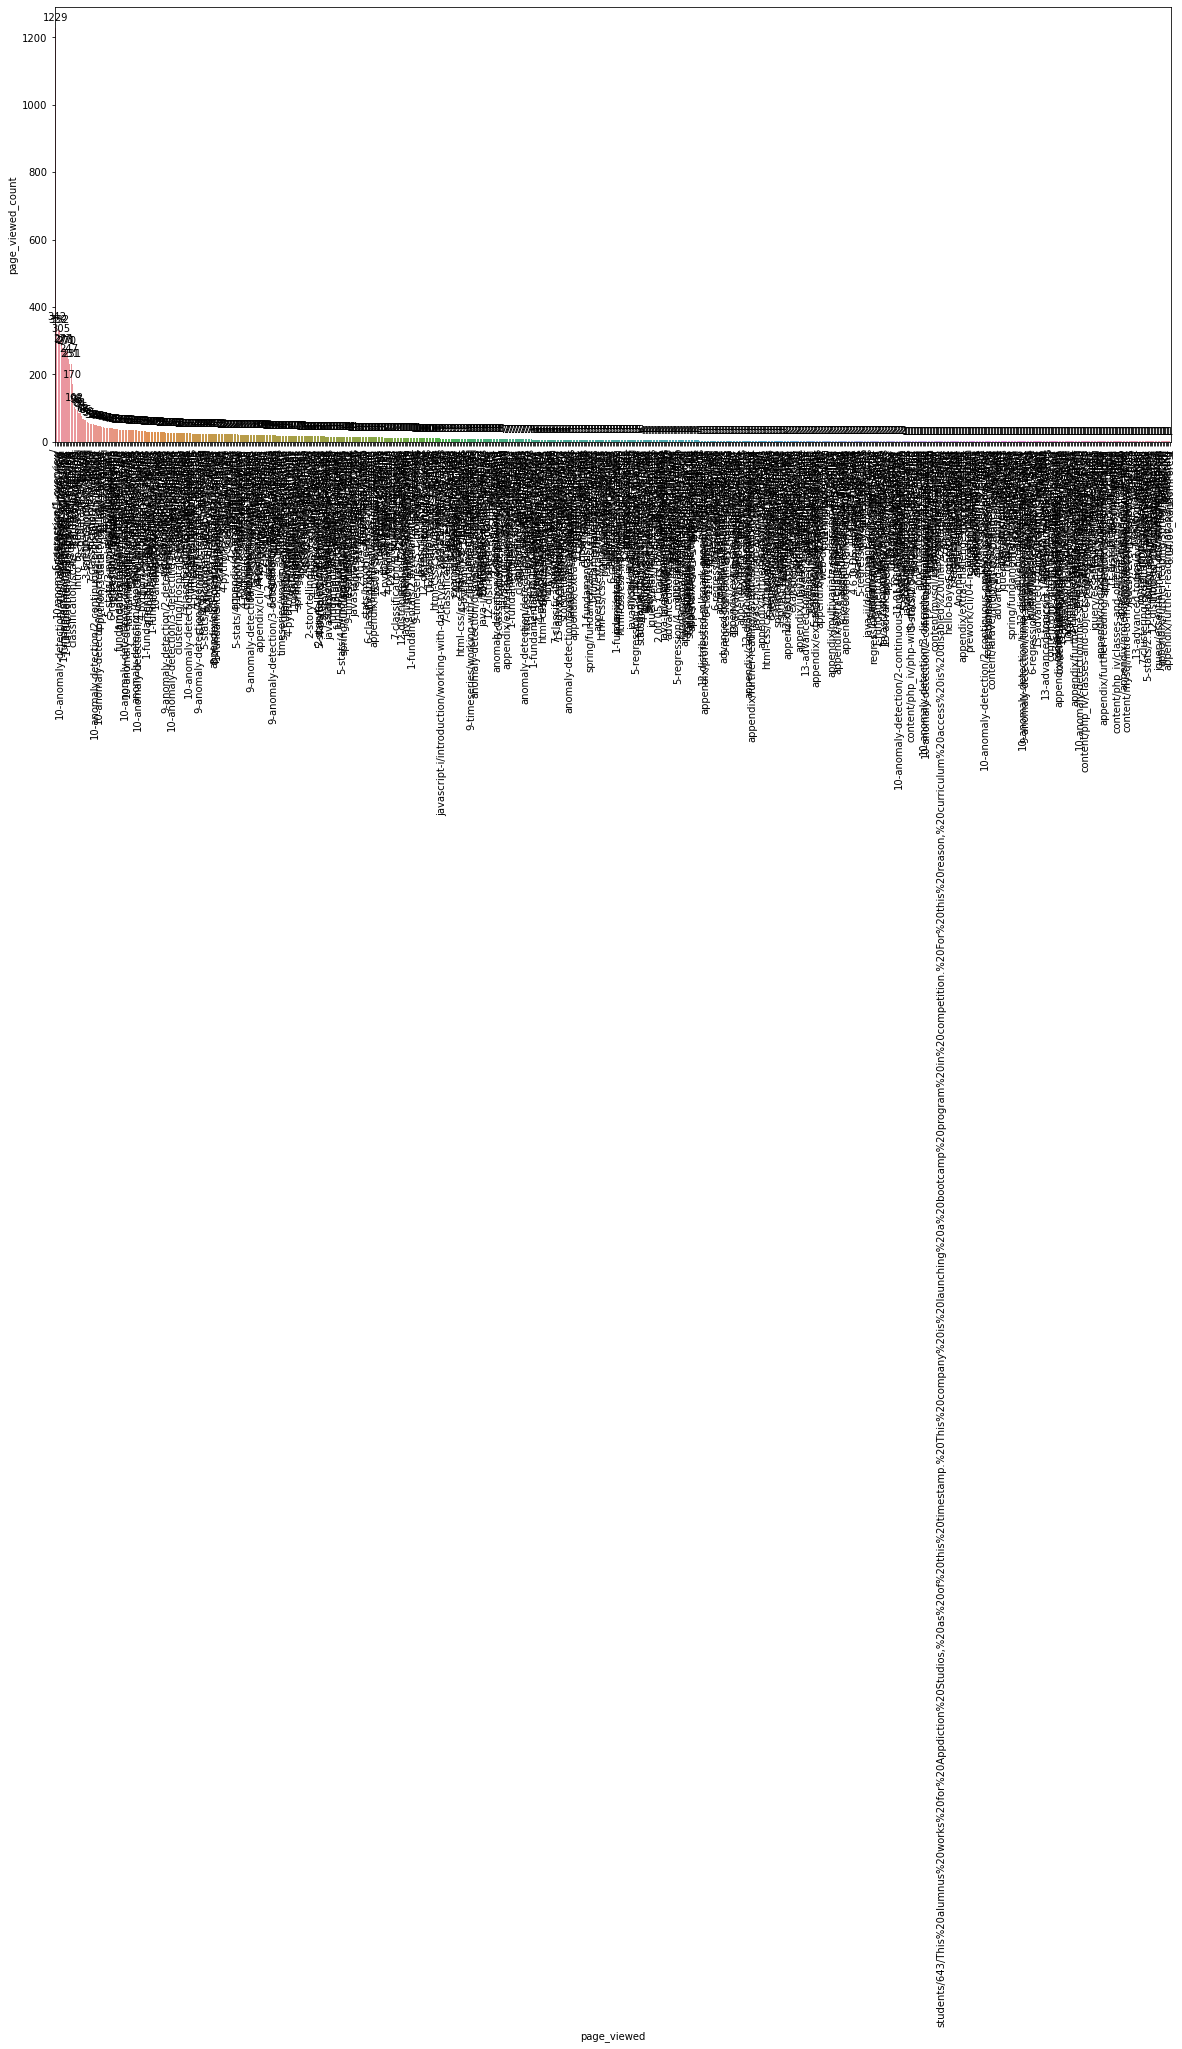

In [67]:
print(len(page_df))

print(page_df.tail(10))

plt.figure(figsize=(20, 8))
splot = sns.barplot(data=page_df, x = 'page_viewed', y = 'page_viewed_count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), 
                   textcoords = 'offset points'
                   )
    plt.xticks(rotation='vertical')

**Detecting anomalies by establishing a baseline and evaluate as new data arrives.**

In [68]:
page_df = pd.DataFrame(train.page_viewed.value_counts(dropna=False)/train.page_viewed.count()).reset_index().\
                rename(index=str, columns={'index': 'page_viewed', 'page_viewed': 'page_viewed_proba'})

In [69]:
page_df

,page_viewed,page_viewed_proba
0,/,0.296460
1,6-regression/1-overview,0.105247
2,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,0.100506
3,10-anomaly-detection/1-overview,0.100506
4,search/search_index.json,0.082491
5,appendix/cli-git-overview,0.071429
6,1-fundamentals/modern-data-scientist.jpg,0.065107
7,1-fundamentals/1.1-intro-to-data-science,0.064791
8,1-fundamentals/AI-ML-DL-timeline.jpg,0.064475
9,3-sql/1-mysql-overview,0.048989


In [70]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day
date,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday


In [71]:
newer_df = newer_df.reset_index().merge(page_df, on=['page_viewed'], how='left').fillna(value=0).set_index('date')
newer_df.page_viewed_proba.value_counts()

0.000000    8303
0.296460    1229
0.100506     664
0.105247     342
0.082491     305
0.065107     273
0.064475     271
0.064791     270
0.071429     247
0.048989     231
Name: page_viewed_proba, dtype: int64

In [72]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day,page_viewed_proba
date,,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday,0.29646
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday,0.00000
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday,0.00000
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday,0.29646
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday,0.00000


In [74]:
page_probs = newer_df.groupby('page_viewed').size().div(len(newer_df))

day_given_page = pd.DataFrame(newer_df.groupby(['page_viewed', 'day']).\
                               size().div(len(newer_df)).\
                               div(page_probs, 
                                   axis=0, 
                                   level='page_viewed').\
                               reset_index().\
                               rename(index=str, 
                                      columns={0: 'proba_day_given_page_viewed'})
                              )

In [75]:
page_day_count = pd.DataFrame(newer_df.groupby(['page_viewed', 'day'])['ip'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'ip': 'page_day_count'}))


page_day = day_given_page.merge(page_day_count)

In [76]:
newer_df = newer_df.reset_index().merge(page_day, on=['page_viewed', 'day'], how='left').fillna(value=0).set_index('date')


In [77]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day,page_viewed_proba,proba_day_given_page_viewed,page_day_count
date,,,,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday,0.00000,0.162791,14
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday,0.00000,0.300000,3
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday,0.00000,0.261905,11


In [78]:
newer_df['proba_day_given_page_viewed'].value_counts()

1.000000    357
0.250000    276
0.500000    270
0.209927    258
0.188771    232
           ... 
0.022222      1
0.009804      1
0.026316      1
0.017857      1
0.014706      1
Name: proba_day_given_page_viewed, Length: 381, dtype: int64

In [79]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day,page_viewed_proba,proba_day_given_page_viewed,page_day_count
date,,,,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday,0.00000,0.162791,14
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday,0.00000,0.300000,3
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday,0.00000,0.261905,11


In [80]:
newer_df.day.value_counts()

Monday       2695
Tuesday      2581
Wednesday    2511
Thursday     2122
Friday       1663
Sunday        372
Saturday      191
Name: day, dtype: int64

In [81]:
ndf = newer_df[['page_viewed_proba']]

<AxesSubplot:xlabel='date'>

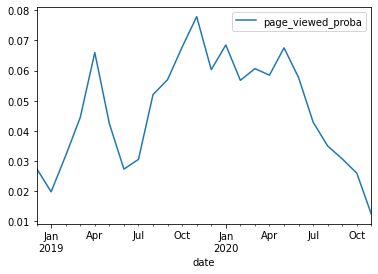

In [82]:
ndf.resample('M').mean().plot()


In [83]:
newer_df.head()

,page_viewed,user_id,cohort_id,ip,day,page_viewed_proba,proba_day_given_page_viewed,page_day_count
date,,,,,,,,
2018-12-07 09:05:02,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 09:05:05,javascript-i,11,28,97.105.19.58,Friday,0.00000,0.162791,14
2018-12-07 09:07:57,javascript-i/coffee-project,11,28,97.105.19.58,Friday,0.00000,0.300000,3
2018-12-07 14:55:06,/,11,28,97.105.19.58,Friday,0.29646,0.175753,216
2018-12-07 14:55:11,java-ii,11,28,97.105.19.58,Friday,0.00000,0.261905,11


In [84]:
count = newer_df.resample('2W').page_viewed.agg('count')

In [85]:
count = count.fillna(value=0)


In [86]:
count = pd.DataFrame(count)

In [87]:
count.head()

,page_viewed
date,
2018-12-09,9
2018-12-23,133
2019-01-06,5
2019-01-20,175
2019-02-03,333


In [88]:
# get mean and standard deviation for randomly generating some data. 
mean = count['page_viewed'].mean()
std = count['page_viewed'].std()

(array([ 5.,  7., 11., 11.,  8.,  6.,  0.,  0.,  2.,  1.]),
 array([  5.,  74., 143., 212., 281., 350., 419., 488., 557., 626., 695.]),
 <BarContainer object of 10 artists>)

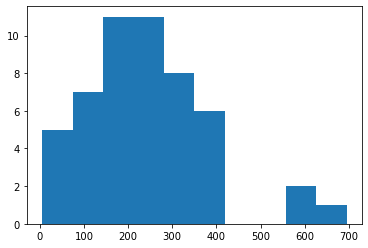

In [90]:
plt.hist(count)

In [91]:
count.index.value_counts()

2019-02-03    1
2020-07-19    1
2019-11-24    1
2020-01-05    1
2020-08-16    1
2020-04-12    1
2019-09-29    1
2019-01-20    1
2020-09-27    1
2019-04-28    1
2020-05-24    1
2019-12-08    1
2019-03-03    1
2019-08-18    1
2019-06-09    1
2020-03-15    1
2019-07-21    1
2018-12-23    1
2020-07-05    1
2020-11-08    1
2019-09-01    1
2020-08-30    1
2019-03-31    1
2018-12-09    1
2020-02-02    1
2020-10-25    1
2020-06-21    1
2019-11-10    1
2019-05-12    1
2020-06-07    1
2019-03-17    1
2020-02-16    1
2020-08-02    1
2019-06-23    1
2020-03-29    1
2020-10-11    1
2019-08-04    1
2020-01-19    1
2019-10-13    1
2019-07-07    1
2020-09-13    1
2019-09-15    1
2019-12-22    1
2019-01-06    1
2019-04-14    1
2020-05-10    1
2019-02-17    1
2019-10-27    1
2020-04-26    1
2019-05-26    1
2020-03-01    1
Name: date, dtype: int64

In [92]:
train = count[:'2020-06-21']
validate = count['2020-07-05':'2020-08-30']
test = count['2020-09-13':]

In [93]:
train.shape, validate.shape, test.shape

((41, 1), (5, 1), (5, 1))

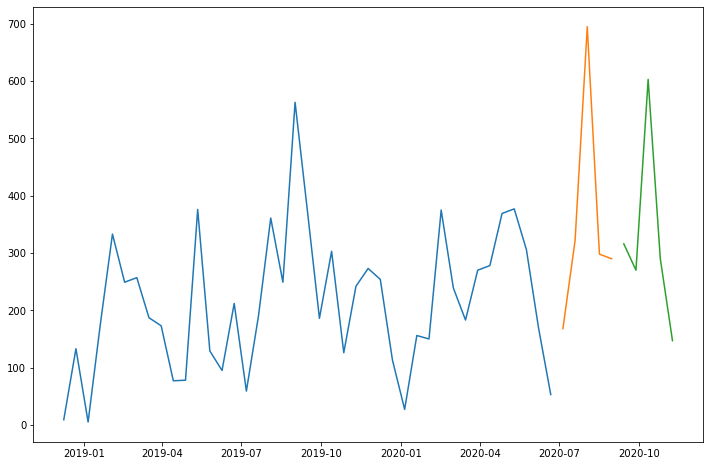

In [94]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(validate)
plt.plot(test)
plt.show()

# Simple Moving Average

In [95]:
# 1 week
sma_short = train.rolling(window=7).mean()
sma_short[:10]

,page_viewed
date,
2018-12-09,NaN
2018-12-23,NaN
2019-01-06,NaN
2019-01-20,NaN
2019-02-03,NaN
2019-02-17,NaN
2019-03-03,165.857143
2019-03-17,191.285714
2019-03-31,197.000000


In [96]:
sma_long = train.rolling(window=30).mean()
sma_long[27:33]

,page_viewed
date,
2019-12-22,NaN
2020-01-05,NaN
2020-01-19,198.900000
2020-02-02,203.600000
2020-02-16,211.666667
2020-03-01,219.466667


Text(0, 0.5, 'Size (MB)')

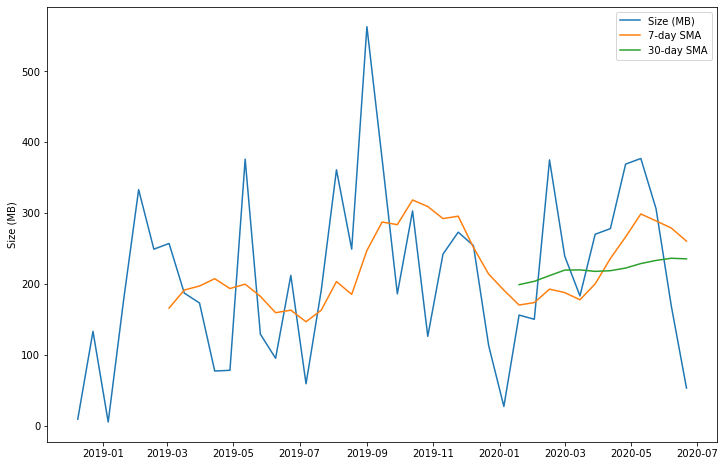

In [97]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(train.index, train, label='Size (MB)')

ax.plot(train.index, sma_short, label = '7-day SMA')

ax.plot(train.index, sma_long, label = '30-day SMA')

ax.legend(loc='best')
ax.set_ylabel('Size (MB)')
# ax.xaxis.(rotate=90)
# ax.xaxis.set_major_formatter(my_datetime_fmt)

# Exponential Moving Average